# Projeto 3 - Otávio Cardoso e Guilherme Zaborowsky Graicer

## -> Introdução

O objetivo do projeto 3 de ciência dos dados é estudar os efeitos de variáveis explicativas em uma determinada variável resposta. A partir da técnica de regressão múltipla, pudemos obter as relações entre duas variáveis explicativas e uma resposta.

O nosso grupo escolheu como variável resposta o índice de mortalidade infantil e como as outras duas variáveis explicativas, o GDP (gross domestic product) per capita e CO2 per capita. Chegando na seguinte problematização: como a mortalidade infantil está relacionada à poluição e ao nível econômico das pessoas no país.

### -> Dados

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/otaviocardoso/Desktop/Projeto 3


In [2]:
MORTE = pd.read_excel('MO.xlsx')
GDP = pd.read_excel('GD.xlsx')
CO2 = pd.read_excel('CO.xlsx')
EXP = pd.read_excel('EXP.xlsx')
dados0 = MORTE.join(GDP, how = 'outer')
dados0 = dados0.join(CO2, how = 'outer')
dados0 = dados0.join(EXP, how = 'outer')


-> Base de dados combinada entre todas as variáveis

In [3]:
dados0.head()

,Morte,GDP,CO2,EXP
Abkhazia,NaN,NaN,NaN,NaN
Afghanistan,105.0,1637.0,0.262174,53.6
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN
Albania,16.6,9374.0,1.336544,77.2
Algeria,27.4,12494.0,3.480977,76.0


In [4]:
dados0.shape

(275, 4)

In [27]:
dados0=dados0[~np.isnan(dados0.Morte)]
dados0=dados0[~np.isnan(dados0.GDP)]
dados0 = dados0[~np.isnan(dados0.EXP)]
dados=dados0[~np.isnan(dados0.CO2)]
dados.shape
dados

,Morte,GDP,CO2,EXP
Afghanistan,105.00,1637.0,0.262174,53.60
Albania,16.60,9374.0,1.336544,77.20
Algeria,27.40,12494.0,3.480977,76.00
Andorra,3.30,38982.0,6.092100,84.70
Angola,182.50,7047.0,1.593918,57.60
Antigua and Barbuda,9.90,20567.0,5.786646,75.80
Argentina,14.60,15765.0,4.466338,75.80
Armenia,18.00,6508.0,1.364888,73.00
Aruba,17.84,33288.0,21.593108,75.06
Australia,4.80,41330.0,16.752301,82.00


In [6]:
dados.GDP = np.log(dados.GDP)
dados.Morte = np.log(dados.Morte)
dados.CO2 = np.log(dados.CO2)

//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2698: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


###  Plotando gráficos de dispersão entre a variável resposta e cada uma das variáveis explicativas

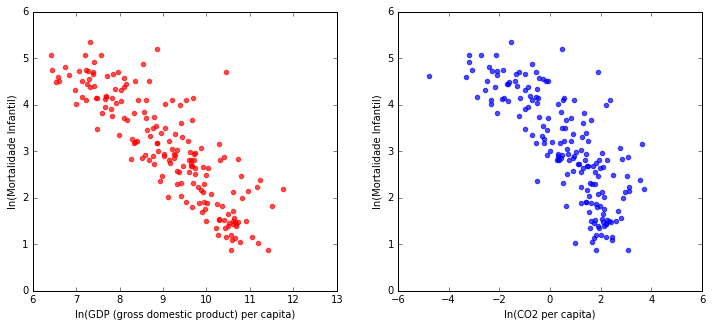

In [7]:
f, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].scatter(dados.GDP, dados.Morte, alpha=0.7, color = 'r')  # Plot the raw data
ax[0].set_xlabel("ln(GDP (gross domestic product) per capita)")
ax[0].set_ylabel("ln(Mortalidade Infantil)")

ax[1].scatter(dados.CO2, dados.Morte, alpha=0.7, color = 'b')  # Plot the raw data
ax[1].set_xlabel("ln(CO2 per capita)")
ax[1].set_ylabel("ln(Mortalidade Infantil)")



-> Calculando as correlações entre variáveis

In [8]:
dados.corr(method='pearson')

,Morte,GDP,CO2,EXP
Morte,1.000000,-0.852225,-0.776161,-0.883995
GDP,-0.852225,1.000000,0.907301,0.778114
CO2,-0.776161,0.907301,1.000000,0.729684
EXP,-0.883995,0.778114,0.729684,1.000000


### Regressão Linear Mortalidade Infantil x GDP/capita


In [9]:
dados.GDP.describe()

count    179.000000
mean       9.090191
std        1.252700
min        6.419995
25%        8.098791
50%        9.247154
75%        9.993570
max       11.759661
Name: GDP, dtype: float64

In [10]:
dados.Morte.describe()

count    179.000000
mean       3.074080
std        1.151549
min        0.875469
25%        2.157409
50%        2.954910
75%        4.099332
max        5.341377
Name: Morte, dtype: float64

In [11]:
dados.GDP.describe()

count    179.000000
mean       9.090191
std        1.252700
min        6.419995
25%        8.098791
50%        9.247154
75%        9.993570
max       11.759661
Name: GDP, dtype: float64

In [12]:
Sxx = 0 

for i in range(len(dados.GDP)):
    x = (dados.GDP[i] - dados.GDP.mean())**2
    Sxx += x
print(Sxx)

279.327744205


In [13]:
SSxy = 0

for i in range(len(dados.GDP)):
    xy = (dados.GDP[i] - dados.GDP.mean())*(dados.Morte[i] - dados.Morte.mean())
    SSxy += xy
SSxy

-218.82847944086734

In [14]:
bêta1 = SSxy/Sxx
print(bêta1)
bêta0 = dados.Morte.mean() - bêta1*dados.GDP.mean()
bêta0

-0.783411186251


10.195437596391518

In [15]:
X = range(140000)

Y = []

for e in X:
    Y.append(bêta1*e + bêta0)
    
print(len(X))
len(Y)

140000


140000

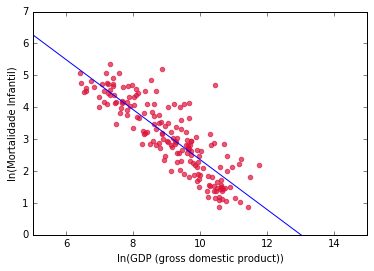

In [16]:
plt.scatter(dados.GDP, dados.Morte, alpha=0.7, color = 'crimson')  # Plot the raw data
plt.xlabel("ln(GDP (gross domestic product))")
plt.ylabel("ln(Mortalidade Infantil)")
plt.plot(X,Y, color = 'b')
plt.ylim(0,7)
plt.xlim(5,15)

plt.show()

De acordo com a regressão linear simples (sendo a variavel resposta Mortalidade Infantil e variavel explicativa GDP per capita) podemos chegar a conclusão que: países que tem o GDP per capita maior, tem menor mortalidade infantil e os que tem um menor GDP per capita, possuem maior mortalidade infantil. Além disso, os coeficientes do nosso modelo, podem ser interpretados da seguinte maneira:

bêta0 : Segundo o nosso modelo, quando o GDP per capita for 0, qual será, aproximadamente o valor de mortalidade infantil

bêta1 : A cada aumento percentual de mortalidade infantil, o aumento percentual do GDP per capita será de -0,78%

### Regressão Linear Mortalidade Infantil x CO2/capita

In [17]:
dados.CO2.describe()

count    179.000000
mean       0.582312
std        1.680991
min       -4.774369
25%       -0.523611
50%        0.912900
75%        1.878766
max        3.691335
Name: CO2, dtype: float64

In [18]:
Sxx2 = 0 

for i in range(len(dados.CO2)):
    x = (dados.CO2[i] - dados.CO2.mean())**2
    Sxx2 += x
print(Sxx2)

502.980355971


In [19]:
SSxy2 = 0

for i in range(len(dados.CO2)):
    xy = (dados.CO2[i] - dados.CO2.mean())*(dados.Morte[i] - dados.Morte.mean())
    SSxy2 += xy
SSxy2

-267.43594021082913

In [20]:
bêta12 = SSxy2/Sxx2
print(bêta12)
bêta02 = dados.Morte.mean() - bêta12*dados.CO2.mean()
bêta02

-0.531702554654


3.3836968612064764

In [21]:
X2 = []
otavio = -70000

for i in range(140000):
    X2.append(otavio)
    otavio += 1

Y2 = []

for e in X2:
    Y2.append(bêta12*e + bêta02)
    


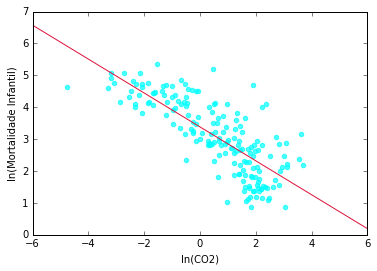

In [22]:
plt.scatter(dados.CO2, dados.Morte, alpha=0.7, color = 'cyan')  # Plot the raw data
plt.xlabel("ln(CO2)")
plt.ylabel("ln(Mortalidade Infantil)")
plt.plot(X2,Y2, color='crimson')
plt.xlim(-6,6)
plt.ylim(0,7)


plt.show()

De acordo com a regressão linear simples (sendo a variavel resposta Mortalidade Infantil e variavel explicativa quantidade de CO2 per capita) podemos chegar a conclusão que: países que tem maior quantidade de CO2, tem menor mortalidade infantil e os que tem um menor quantidade de CO2, possuem maior mortalidade infantil. Além disso, os coeficientes do nosso modelo, podem ser interpretados da seguinte maneira:

bêta0 : Segundo o nosso modelo, quando a quantidade de CO2 per capita for 0, qual será, aproximadamente o valor de mortalidade infantil

bêta1 : A cada aumento percentual de mortalidade infantil, o aumento percentual de CO2 per capita será de -0.53%

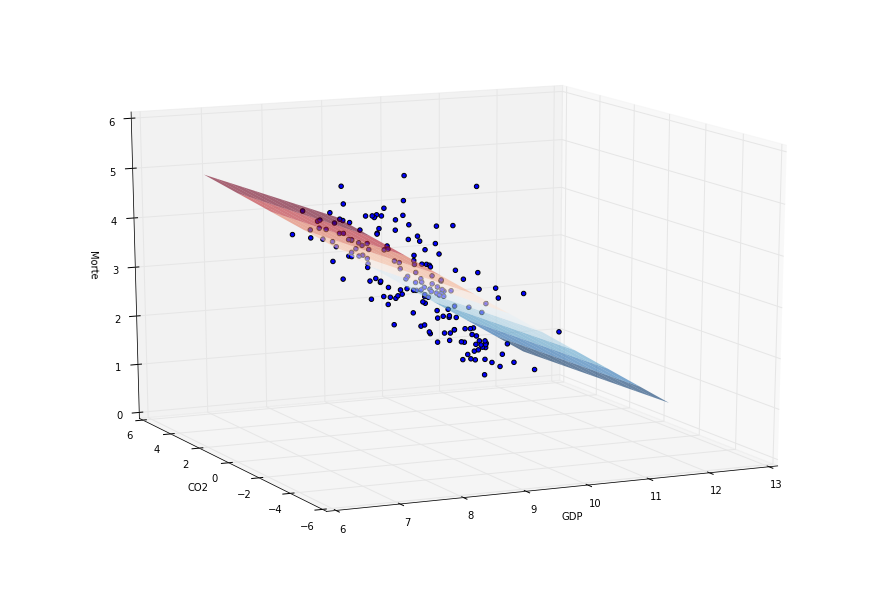

In [23]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['GDP', 'CO2']]
y = dados['Morte']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.GDP.min(), X.GDP.max(), 100), 
                       np.linspace(X.CO2.min(), X.CO2.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].GDP, X[resid >= 0].CO2, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].GDP, X[resid < 0].CO2, y[resid < 0], color='black', alpha=1.0)

ax.set_xlabel('GDP')
ax.set_ylabel('CO2')
ax.set_zlabel('Morte')

### Tabela de regressão múltipla

In [25]:
#Linear Regression - SEGUNDA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Informando X como matriz de planejamento

#Montagem dos dados
y=dados.Morte
X=dados.iloc[:,(1,2)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Morte   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           2.99e-50
Time:                        09:45:01   Log-Likelihood:                -162.77
No. Observations:                 179   AIC:                             331.5
Df Residuals:                     176   BIC:                             341.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         10.0762      0.751     13.413      0.000         8.594    11.559
GDP           -0.7696      0.086     -8.927      0.000        -0.940    -0.599
CO2           -0.0114      0.064     -0.177      0.860        -0.138     0.115
==============================================================================
Omnibus:                       32.966   Durbin-Watson:                   2.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.022
Skew:                           0.988   Prob(JB):                     8.33e-12
Kurtosis:                       4.713   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A partir das tabelas apresentadas anteriormente, pode-se concluir que a variável GDP tem um impacto negativo na variável resposta (mortalidade infantil), uma vez que o seu valor de "t", em módulo, é alto e "P" ser 0. Já a variável CO2 possui um valor de "t" próximo de 0 e um valor "P" muito maior que um alpha de10%, logo não há evidências de que ela tenha relação com a variável resposta, mesmo apresentando uma correlação ala e um coeficiente de determinação (r squared) alto também.

In [26]:
#Teste de White
#y estimados
y_hat = fit.predict(X)

#Resíduos quadráticos
res2=(y-y_hat)**2

sm1.stats.diagnostic.het_white(res2,X)

(2.0059296046727582,
 0.84832395499805502,
 0.39213270911650877,
 0.85376506269165597)

## Separando em grupos

In [28]:
dados.EXP.describe()

count    179.000000
mean      70.593017
std        9.065279
min       32.200000
25%       64.800000
50%       73.100000
75%       77.250000
max       84.700000
Name: EXP, dtype: float64

Decidimos separar os países em 2 grupos: um com expectativa de vida acima de 70 anos e outro com expectativa de vida menor ou igual a 70 anos

#### GRUPO 1 - EXPECTATIVA DE VIDA MAIOR QUE 70 ANOS

In [31]:
dados1 = pd.DataFrame()
dados1=dados

dados1 = dados1[dados.EXP > 70]

dados1.head()

,Morte,GDP,CO2,EXP
Albania,16.6,9374.0,1.336544,77.2
Algeria,27.4,12494.0,3.480977,76.0
Andorra,3.3,38982.0,6.092100,84.7
Antigua and Barbuda,9.9,20567.0,5.786646,75.8
Argentina,14.6,15765.0,4.466338,75.8


In [32]:
#Linear Regression - SEGUNDA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Informando X como matriz de planejamento

#Montagem dos dados
y=dados1.Morte
X=dados1.iloc[:,(1,2)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Morte   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     21.78
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           1.07e-08
Time:                        10:26:17   Log-Likelihood:                -415.65
No. Observations:                 113   AIC:                             837.3
Df Residuals:                     110   BIC:                             845.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         21.0471      1.402     15.008      0.000        18.268    23.826
GDP           -0.0003      6e-05     -5.339      0.000        -0.000    -0.000
CO2            0.1761      0.178      0.989      0.325        -0.177     0.529
==============================================================================
Omnibus:                       53.556   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.898
Skew:                           1.829   Prob(JB):                     5.66e-32
Kurtosis:                       7.145   Cond. No.                     5.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A partir das tabelas apresentadas anteriormente, pode-se concluir que, para o grupo 1 (expectativa de vida maior que 70 anos) a variável GDP tem um impacto negativo na variável resposta (mortalidade infantil), uma vez que o seu valor de "t", em módulo, é razoavelmente alto (menor do que no teste anterior) e "P" ser 0. Já a variável CO2 possui um valor de "t" positivo, próximo de 0  e um valor "P" muito maior que um alpha de10%, logo não há evidências de que ela tenha relação com a variável resposta.

#### GRUPO 2 - EXPECTATIVA DE VIDA MENOR OU IGUAL A 70

In [34]:
dados2 = pd.DataFrame()
dados2=dados

dados2 = dados2[dados.EXP <= 70]

dados2.head()

,Morte,GDP,CO2,EXP
Afghanistan,105.0,1637.0,0.262174,53.6
Angola,182.5,7047.0,1.593918,57.6
Bangladesh,49.6,2459.0,0.377610,68.8
Benin,111.6,1637.0,0.586260,60.8
Botswana,60.3,13642.0,2.607113,55.6


In [35]:
#Linear Regression - SEGUNDA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Informando X como matriz de planejamento

#Montagem dos dados
y=dados2.Morte
X=dados2.iloc[:,(1,2)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Morte   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     4.731
Date:                Tue, 06 Dec 2016   Prob (F-statistic):             0.0122
Time:                        10:29:24   Log-Likelihood:                -331.67
No. Observations:                  66   AIC:                             669.3
Df Residuals:                      63   BIC:                             675.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         88.0334      5.959     14.773      0.000        76.125    99.942
GDP         4.121e-05      0.001      0.033      0.974        -0.002     0.003
CO2           -4.9395      2.448     -2.017      0.048        -9.832    -0.047
==============================================================================
Omnibus:                       12.878   Durbin-Watson:                   2.372
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.658
Skew:                           0.978   Prob(JB):                      0.00108
Kurtosis:                       4.068   Cond. No.                     9.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A partir das tabelas apresentadas anteriormente, pode-se concluir que, para o grupo 2 (expectativa de vida menor que 70 anos) a variável GDP tem um impacto positivo muito pequeno na variável resposta (mortalidade infantil), uma vez que o seu valor de "t", é baixo e "P" ser alto, maior que 10%. Já a variável CO2 possui um valor de "t" negativo, porém baixo e um valor "P" próximo de 0, logo há evidências de que ela tenha uma relação negativa com a variável resposta.

### Conclusão

A partir das análises feitas anteriormente, é possível responder a nossa problematização inicial, que era: como a mortalidade infantil está relacionada à poluição e ao nível econômico das pessoas no país ?

A relação entre a variável explicativa (quantidade de CO2 per capita) e a variável resposta (taxa de mortalidade infantil) é negativa, ou seja, quanto menor a quantidade de CO2, maior a taxa de mortalidade. Num primeiro instante, isso pode parecer estranho, porém, podemos associar a quantidade de CO2 per capita com o índice de desenvolvimento de um país, uma vez que em geral, um país mais desenvolvido possui mais indústrias, explicando assim uma maior quantidade de CO2 no ar.

Além disso, ao analisarmos o gráfico 3d, percebemos que a variável explicativa que mais influencia na nossa respota, é o GDP per capita. A relação entre essas duas variaveis é negativa e bem explicita.

Ao dividirmos os países em dois subgrupos com base na expectativa de vida dos países, percebe-se que as conclusoes chegadas ao analisar o sistema como um todo são as mesma obtidas para o grupo 1 (países com expectativa de vida maior que 70 anos), porém não são as mesmas quando olhamos para um sistema local para o grupo 2 (países com expectativa de vida menor que 70 anos), já que para ele, a variável GDP possui um impacto positivo, porém pequeno e CO2 possui um negativo, porém mínimo. 